<a href="https://colab.research.google.com/github/ALRIER/DtaScienceAssignments_WaterlooUniversity/blob/Assignments/Stats4DataScience/Stat4DS_assig1Permutations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
import statsmodels.api as sm
from scipy import stats
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')    


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
doc= '/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/Assignment1Mosquitos&Beer/mosquitos_data.csv'
df=pd.read_csv(doc)
df.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


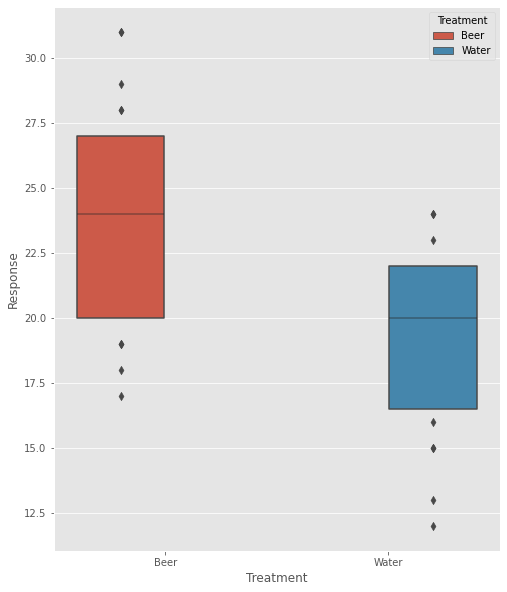

In [ ]:
ax=plt.figure(figsize=(8,10))
sns.boxenplot(data=df,x="Treatment", y="Response",hue ="Treatment")


In [ ]:
df1=df.copy()
dfgrouped=df1.groupby(['Treatment'])
dfbeer=dfgrouped.get_group('Beer')
dfbeer.describe()

,Response
count,25.000000
mean,23.600000
std,4.133199
min,17.000000
25%,20.000000
50%,24.000000
75%,27.000000
max,31.000000


In [ ]:
dfwater=dfgrouped.get_group('Water')
dfwater.describe()

,Response
count,18.000000
mean,19.222222
std,3.671120
min,12.000000
25%,16.500000
50%,20.000000
75%,22.000000
max,24.000000


In [ ]:
watermean=np.mean(dfwater)
beermean=np.mean(dfbeer)

In [ ]:
Meandif= beermean-watermean
Meandif

Response    4.377778
dtype: float64

The Database is split into two boxplots, the red one is related to beer treatment. Thus, based on the above-mentioned it is possible to see that there are 3 outliers in the upper side of the boxplot that have response values between 27 to 35. So on, it's possible to see 3 outliers on the downside of the graphic, its values are around 18 to 16.7. However, 25% of the treatment based on beer is located around 20; 50% of the sample is located around 24 and 75% of the sample is located in a response range of around 26.9 +/-.

At the opposite corner, the blue boxplot shows the treatment based on water, in which is possible to observe four outliers at the bottom of the graphic, its ranges are between 11.5 to 16; however, in my opinion, the most interesting part of the graphic is the body of the boxplot, since it shows that the 25% of the sample has a response around 16.7, which in fact corresponds with the first outlier in the beer boxplot. Continuing with the analysis, it is possible to observe that 50% of the sample is located in 20. In comparison, the mean response in the beer group is around 24; it is a notorious difference between the two average responses in those groups.      

Finally, comparing the 75% of both groups, it's possible to evidence a big difference, since the response in the beer groups is around 27, but the water one is about 22. 

In general terms, it's possible to say that the beer group has a higher response rate in comparison with the water one which in a first step would be proof to deduce that in fact, beer consumption is more attractive to mosquitos. However, it's just a general approximation to the hypothesis and it would need a deeper understanding of the phenomenon.     

In [ ]:
beer=dfbeer['Response']
casesbeer=beer.count()
casesbeer

25

In [ ]:
water = dfwater['Response']
caseswater=water.count()
caseswater

18

"As we assume that there is no difference and the outcome is just by chance. If the assumption is true, then there is no difference between observations in subgroups and any number from the beer group could be in the water group, and vice versa. It implies that we may randomly shuffle data - move numbers between subgroups and each time compute the average number for each subgroup and take their difference. In the end, we should get the distribution of experimental outcomes or the results of many simulated experiments. This is called a permutation test." Sergiy Nokhrin

Based on that argument, I will proceed to merge the list of numbers with the observations in each experiment. 

In [ ]:
merged= np.append(beer, water)

Perfect, so now I will shuffle it to create a new list of possibilities. 

In [ ]:
np.random.shuffle(merged)
merged

array([22, 24, 21, 24, 31, 21, 12, 24, 20, 19, 24, 20, 15, 28, 21, 16, 19,
       25, 20, 26, 19, 21, 17, 23, 23, 21, 20, 20, 20, 27, 24, 18, 31, 22,
       28, 13, 19, 22, 27, 15, 27, 18, 29])

perfect, now I will re organize the lists with the new order 

In [ ]:
beernew = merged[:casesbeer]
waternew = merged[casesbeer:]

In [ ]:
beernew

array([22, 24, 21, 24, 31, 21, 12, 24, 20, 19, 24, 20, 15, 28, 21, 16, 19,
       25, 20, 26, 19, 21, 17, 23, 23])

In [ ]:
waternew

array([21, 20, 20, 20, 27, 24, 18, 31, 22, 28, 13, 19, 22, 27, 15, 27, 18,
       29])

Perfect, now I will create a for loop to repeat the process of shuffle, split and merge and compare the means 10000 times.

I will keep all the observations in a new variable called "counts"

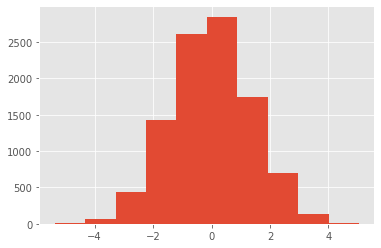

In [ ]:
counts=[]
for num_simulations in range(10000):
    np.random.shuffle(merged) 
    beernew = merged[:casesbeer]
    waternew = merged[casesbeer:]
    newdif = np.mean(beernew) - np.mean(waternew)
    counts.append(newdif)
plt.hist(counts);

Once I have the result I will count the times each observation in the variable "counts" is superior or equal to the mean in the first observation. 

In [ ]:
f=0
for i in counts:
  if i >= 4.377:
    f += 1

f

5

And thake a look of the prbability, wich in this case is about 0.005% 

In [ ]:
prob=f/10000
prob

0.0005